# Convolutional Network

In this case we will work with convolutional networks for the analysis and classification of black and white images. We will use the well-known MNIST dataset, which is a set of black and white images of the digits 0-9 drawn by hand, used to test computer vision models.

In [ ]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical # one-hot encoding
from tensorflow.keras.optimizers import SGD # optimizer

# dataset MNIST
from keras.datasets import mnist

**1. Dataset exploration**

In [ ]:
# cargamos los datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# tamaño del dataset
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


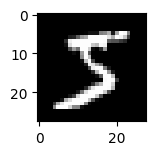

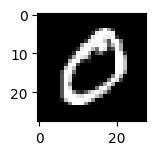

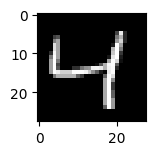

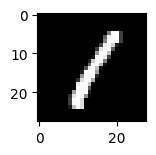

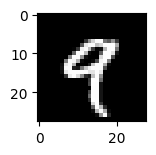

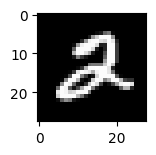

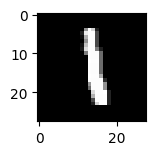

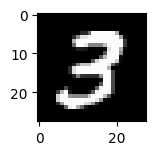

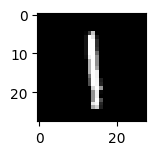

In [ ]:
# visualizacion de imagenes
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

We have a total of 10 classes for each digit.

In [ ]:
# clases únicas
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We use one-hot encoding to create a binary column for each class.

In [ ]:
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


We must normalize the inputs, which have data ranging from 0 to 255.

In [ ]:
np.min(X_train), np.max(X_train)

(0, 255)

In [ ]:
# setting input size to a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
# scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

**2. Construction of the neural network**

Construction of the neural network

In [ ]:
# baseline model
def baseline_model(X):
  # we declare a sequential model
  model = Sequential()

  # we add a convolutional layer
  # No. of filters is associated with no. of characteristics to detect
  # kernel size is the size of the convolution matrix
  # padding prevents the size from decreasing after convolution
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1), padding='same'))

  # we add max pooling layer
  # reduce image size to focus on features to learn
  model.add(MaxPooling2D((2, 2)))

  # we convert the 2D layers to 1D
  model.add(Flatten())

  # we add a dense layer to recover the features
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

  # output layer (multiple classification)
  model.add(Dense(10, activation='softmax'))

	# we compile the model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

  return model

In [ ]:
# creamos un objeto para el modelo
model = baseline_model(X_train)

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 628630 (2.40 MB)
Trainable params: 628630 (2.40 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# model training
history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
469/469 [==============================] - 6s 6ms/step - loss: 0.2606 - accuracy: 0.9232
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1075 - accuracy: 0.9688
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0720 - accuracy: 0.9790
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0553 - accuracy: 0.9834
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0438 - accuracy: 0.9876
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0366 - accuracy: 0.9894
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0303 - accuracy: 0.9910
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0266 - accuracy: 0.9921
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0225 - accuracy: 0.9935
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9950

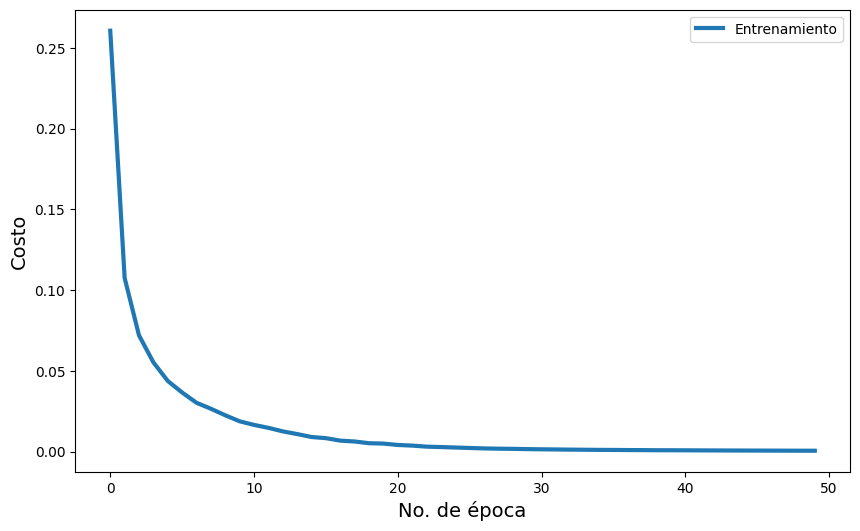

In [ ]:
# visualization of cost function (categorical crossentropy)
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], linestyle='-', linewidth=3.0, label='Training')
#plt.plot(history.history['val_loss'], linestyle='-', linewidth=3.0, label='Validation')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.legend()

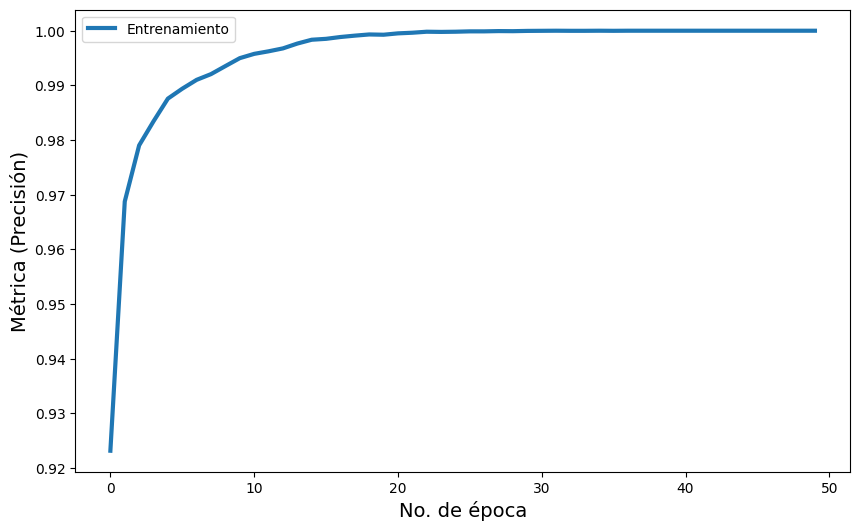

In [ ]:
# visualization of accuracy
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], linestyle='-', linewidth=3.0, label='Training')
#plt.plot(history.history['val_accuracy'], linestyle='-', linewidth=3.0, label='Validation')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Metric (Accuracy)', fontsize=14)
plt.legend()

In [ ]:
# evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=1)
print('Cost (validation):', val_loss)
print('Accuracy (validation):', val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.9878
Pérdida (validación): 0.04620277136564255
Exactitud (validación): 0.9878000020980835


**3. Improving the model**

In [ ]:
# improved model
def model_2(X):
  # we declare a sequential model
  model = Sequential()

  # we add a convolutional layer
  model.add(Conv2D(32, (4, 4), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

  # we add max pooling layer
  model.add(MaxPooling2D((2, 2)))

  # we convert the 2D layers to 1D
  model.add(Flatten())

  # we add a dense layer to recover the features
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

  # renormalization layer
  model.add(BatchNormalization())

  # output layer (multiple classification)
  model.add(Dense(10, activation='softmax'))

	# we compile the model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

  return model

In [ ]:
# create an object for the model
model_2 = model_2(X_train)

# resumen del modelo
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               627300    
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
# model training
history_2 = model_2.fit(X_train, y_train, epochs=15, batch_size=128, verbose=1, validation_data=[X_test, y_test])

Epoch 1/15
469/469 [==============================] - 4s 5ms/step - loss: 0.1660 - accuracy: 0.9514 - val_loss: 0.0807 - val_accuracy: 0.9781
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.0520 - val_accuracy: 0.9844
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0383 - accuracy: 0.9896 - val_loss: 0.0444 - val_accuracy: 0.9849
Epoch 4/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0265 - accuracy: 0.9933 - val_loss: 0.0423 - val_accuracy: 0.9863
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0182 - accuracy: 0.9958 - val_loss: 0.0452 - val_accuracy: 0.9855
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0131 - accuracy: 0.9976 - val_loss: 0.0388 - val_accuracy: 0.9867
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0091 - accuracy: 0.9986 - val_loss: 0.0420 - val_accuracy: 0.9862
Epoch 

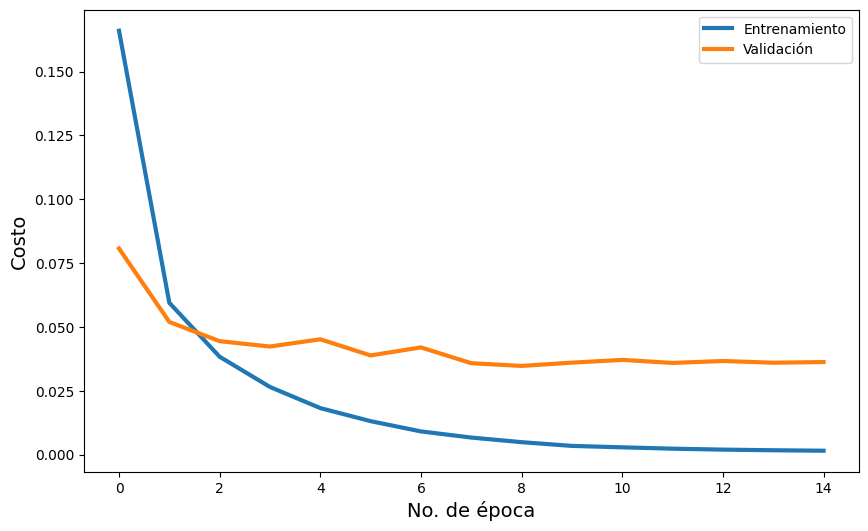

In [ ]:
# visualization of cost function (categorical crossentropy)
fig = plt.figure(figsize=(10,6))
plt.plot(history_2.history['loss'], linestyle='-', linewidth=3.0, label='Training')
plt.plot(history_2.history['val_loss'], linestyle='-', linewidth=3.0, label='Validation')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.legend()

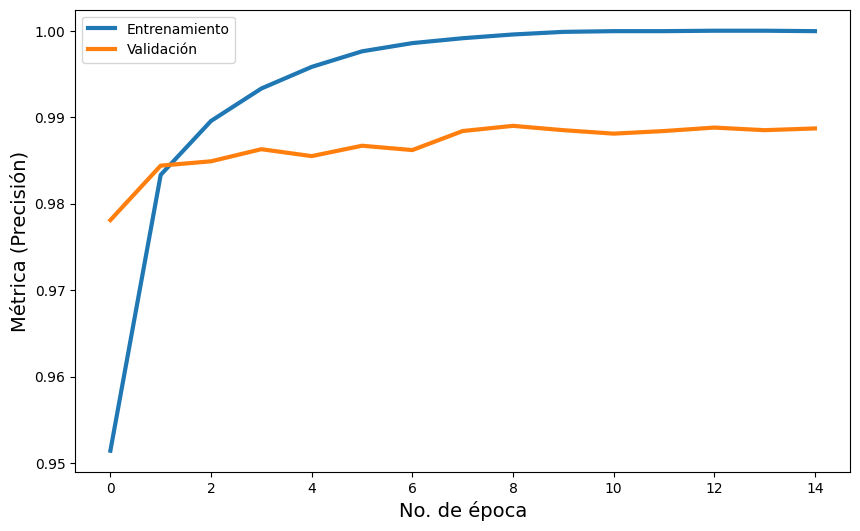

In [ ]:
# visualization of accuracy
fig = plt.figure(figsize=(10,6))
plt.plot(history_2.history['accuracy'], linestyle='-', linewidth=3.0, label='Training')
plt.plot(history_2.history['val_accuracy'], linestyle='-', linewidth=3.0, label='Validation')

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Metric (Accuracy)', fontsize=14)
plt.legend()

In [ ]:
# model evaluation
val_loss_2, val_acc_2 = model_2.evaluate(X_test, y_test, verbose=1)
print('Model 2')
print('Cost (validation):', val_loss_2)
print('Accuracy (validation):', val_acc_2)

313/313 [==============================] - 1s 2ms/step - loss: 0.0363 - accuracy: 0.9887
Modelo 2
Pérdida (validación): 0.03625357896089554
Exactitud (validación): 0.9886999726295471


In [ ]:
print('Model 1')
print('Cost (validation):', val_loss)
print('Accuracy (validation):', val_acc)

Modelo 1
Pérdida (validación): 0.04620277136564255
Exactitud (validación): 0.9878000020980835


We can save our model if we are satisfied.

In [ ]:
# save model
model.save('modelo_cnn_base.h5')
model_2.save('modelo_cnn_mejorado.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# load model
model_3 = load_model('modelo_cnn_base.h5')

In [ ]:
# display loaded model summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 628630 (2.40 MB)
Trainable params: 628630 (2.40 MB)
Non-trainable params: 0 (0.00 Byte)
____________________